In [4]:
%load_ext autoreload
%autoreload 2

import sys
import os
import pickle
sys.path.append('../src')
sys.path.append('../src/visualization')

from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np


import missingno
from observables_plot import *
from plot_25_trajectories import *
from general_overvies import *
from simulation.simulation import *


In [6]:
# Define your parameters
param = {
        "n_of_replicas": 1,            # Fewer replicas due to larger size
        "n_humans": 100,                # LARGER NETWORK
        "n_bots": 10,                   # Will be overridden by grid
        "nei": 6,                       # More neighbors for larger network
        "p": 0.05,
        "N_steps": 500,                # More steps for larger system
        "waiting_time": 100,         
        "mu": 0.15,
        "epsilon": 0.3,
        "bot_threshold": -0.5,          # Will be overridden by grid
        "beta0": 0.0125,                # R0 = 3, but 6 hours time step now
        "recovery_rate": 0.025,
        "I0": 2,                        # More initial infected
        "communication_error": 0.3,     # Will be overridden by grid
        "post_history": 10,
        "feed_size": 5,

        "disease_model": "SIRV",        # or "SIR" for original model
        "xi_max": 0.05/4,  # Maximum daily vaccination probability (5% per day)
        "use_discrete_vaccination": True,  # Match your susceptibility approach
        "vaccination_groups": 5  # Number of discrete vaccination behavior groups
    }


In [9]:
# Run simulation
print("Running simulation...")
results = simulations(param)
print("Done!")

Running simulation...
Running replica 1/1
Step 0 of 500
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV
SIRV

In [4]:
param["n_bots"] = 0
print("Running simulation...")
results_0 = simulations(param)
print("Done!")

Running simulation...
Running replica 1/10
Step 0 of 2000
Step 500 of 2000
Step 1000 of 2000
Step 1500 of 2000
Running replica 2/10
Step 0 of 2000
Step 500 of 2000
Step 1000 of 2000
Step 1500 of 2000
Running replica 3/10
Step 0 of 2000
Step 500 of 2000
Step 1000 of 2000
Step 1500 of 2000
Running replica 4/10
Step 0 of 2000
Step 500 of 2000
Step 1000 of 2000
Step 1500 of 2000
Running replica 5/10
Step 0 of 2000
Step 500 of 2000
Step 1000 of 2000
Step 1500 of 2000
Running replica 6/10
Step 0 of 2000
Step 500 of 2000
Step 1000 of 2000
Step 1500 of 2000
Running replica 7/10
Step 0 of 2000
Step 500 of 2000
Step 1000 of 2000
Step 1500 of 2000
Running replica 8/10
Step 0 of 2000
Step 500 of 2000
Step 1000 of 2000
Step 1500 of 2000
Running replica 9/10
Step 0 of 2000
Step 500 of 2000
Step 1000 of 2000
Step 1500 of 2000
Running replica 10/10
Step 0 of 2000
Step 500 of 2000
Step 1000 of 2000
Step 1500 of 2000
Done!


In [7]:
mean_I_0 = np.mean(results_0["I_count"]+results_0["R_count"], axis=0)
mean_I_20 = np.mean(results_20["I_count"]+results_20["R_count"], axis=0)

median_I_0 = np.median(results_0["I_count"]+results_0["R_count"], axis=0)
median_I_20 = np.median(results_20["I_count"]+results_20["R_count"], axis=0)










In [9]:
180*10/60

30.0

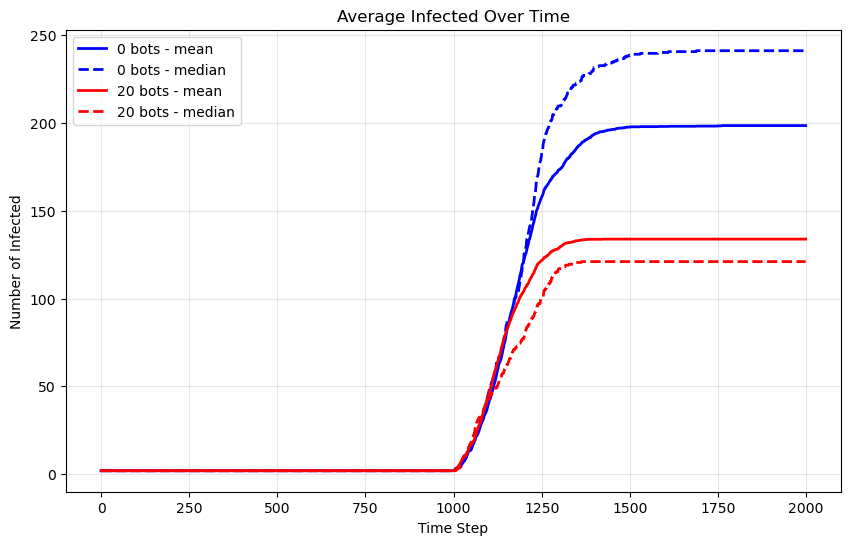

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(mean_I_0, label='0 bots - mean', linewidth=2, color='blue')
plt.plot(median_I_0, label='0 bots - median', linewidth=2, color='blue', linestyle='--')
plt.plot(mean_I_20, label='20 bots - mean', linewidth=2, color='red')
plt.plot(median_I_20, label='20 bots - median', linewidth=2, color='red', linestyle='--')
plt.xlabel('Time Step')
plt.ylabel('Number of Infected')
plt.title('Average Infected Over Time')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

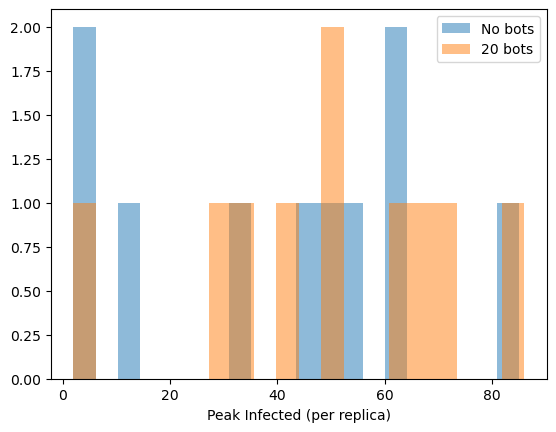

No bots - 25th, 50th, 75th, 90th percentiles:
[16.25 47.   60.   64.3 ]
20 bots:
[37.  52.  67.  73.4]


In [28]:
# Compare full distributions
plt.hist(results_0["I_count"].max(axis=1), alpha=0.5, label='No bots', bins=20)
plt.hist(results_20["I_count"].max(axis=1), alpha=0.5, label='20 bots', bins=20)
plt.xlabel('Peak Infected (per replica)')
plt.legend()
plt.show()

# Print quantiles
print("No bots - 25th, 50th, 75th, 90th percentiles:")
print(np.percentile(results_0["I_count"].max(axis=1), [25, 50, 75, 90]))
print("20 bots:")
print(np.percentile(results_20["I_count"].max(axis=1), [25, 50, 75, 90]))